In [24]:
import matplotlib.pyplot as plt
from keras.datasets import mnist # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Flatten, Dropout # type: ignore #3º Etapa e 4º Etapa
from tensorflow.keras import utils as np_utils # type: ignore
from keras.layers import Conv2D, MaxPooling2D # type: ignore #1º Etapa e 2º Etapa
from tensorflow.keras.layers import BatchNormalization # type: ignore # 

In [2]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Text(0.5, 1.0, 'Classe5')

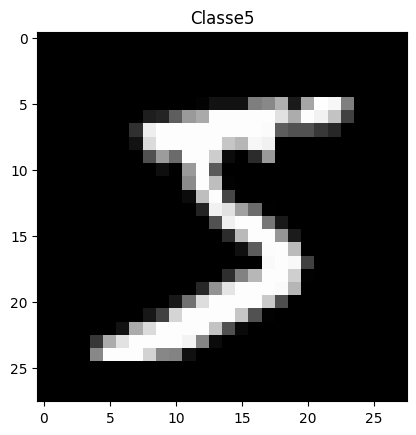

In [8]:
plt.imshow(X_treinamento[0], cmap = 'gray')
plt.title('Classe' + str(y_treinamento[0]))

In [10]:
#Transformando os dados no formato do TensorFLow
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 28, 28, 1) #Dimensões 28x28 e 1 que é o canal
previsores_teste = X_teste.reshape(X_teste.shape[0], 28, 28, 1) #Dimensões 28x28 e 1 que é o canal
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [16]:
previsores_treinamento /= 255 #NORMALIZAÇÃO, para que fiquem no intervalo de 0 e 1 (Cada um dos valores ocupa um byte que vai de 0 até 255) 
previsores_teste /= 255 #NORMALIZAÇÃO, para que fiquem no intervalo de 0 e 1 (Cada um dos valores ocupa um byte que vai de 0 até 255)

In [18]:
classe_treinamento = np_utils.to_categorical(y_treinamento, 10) #Criação das varipaveis do tipo Dummy
classe_teste = np_utils.to_categorical(y_teste, 10) #Criação das varipaveis do tipo Dummy

In [19]:
#Criando Rede Neural:
classificador = Sequential()
classificador.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))#Camada de Convolução: 32 detectores de caracteristicas, 3x3 é o periodo de corte que ele ira fazer nos pixels
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2))) #Processo de refino.
classificador.add(Flatten()) #Transformação de um formato de matriz para um formato de vetor.

classificador.add(Conv2D(32,(3,3),activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))
classificador.add(Flatten())

classificador.add(Dense(units=128,activation='relu')) #128 é um padrão default de entradas, função relu é a mais recomendada para modelos assim
classificador.add(Dropout(0.2))
classificador.add(Dense(units=10,activation='softmax'))
classificador.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento, batch_size=128,epochs=5,validation_data=(previsores_teste, classe_teste))

c:\Users\samue\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8744 - loss: 0.4489 - val_accuracy: 0.9745 - val_loss: 0.0834
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9771 - loss: 0.0769 - val_accuracy: 0.9816 - val_loss: 0.0553
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9861 - loss: 0.0459 - val_accuracy: 0.9830 - val_loss: 0.0521
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9889 - loss: 0.0357 - val_accuracy: 0.9833 - val_loss: 0.0485
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9919 - loss: 0.0275 - val_accuracy: 0.9848 - val_loss: 0.0458


In [20]:
resultado = classificador.evaluate(previsores_teste, classe_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9799 - loss: 0.0576
